In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# В этом датасете акцент будет сделан преимущественно на классификацию

In [35]:
df=pd.read_csv("us_tornado_dataset_1950_2021.csv")

In [3]:
df.head(10,)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100
5,1950,1,25,1950-01-25,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.3,300
6,1950,1,26,1950-01-26,TX,2,2,0,26.88,-98.12,26.88,-98.05,4.7,133
7,1950,2,11,1950-02-11,TX,2,0,0,29.42,-95.25,29.52,-95.13,9.9,400
8,1950,2,11,1950-02-11,TX,2,5,0,32.35,-95.20,32.42,-95.20,4.6,100
9,1950,2,11,1950-02-11,TX,2,6,0,32.98,-94.63,33.00,-94.70,4.5,67


## yr: Год, когда произошел торнадо.
## mo: Месяц, в котором произошел торнадо.
## dy: День, в который произошел торнадо.
## date: Дата события торнадо.
## st: Штат, в котором произошло торнадо (например, "IL" для Иллинойса).
## mag: Магнитуда торнадо.
## inj: Количество раненых из-за торнадо.
## fat: Количество погибших из-за торнадо.
## slat: Широта начала торнадо.
## slon: Долгота начала торнадо.
## elat: Широта конца торнадо.
## elon: Долгота конца торнадо.
## len: Длина торнадо (в милях).
## wid: Максимальная ширина торнадо (в метрах).

<AxesSubplot:>

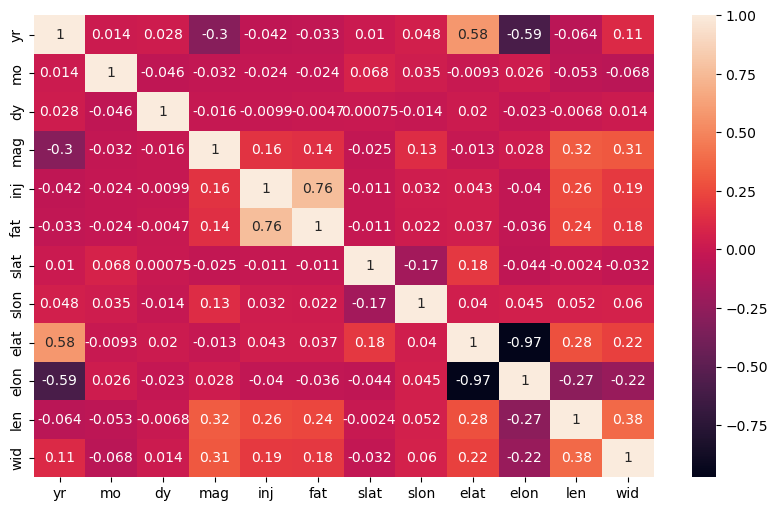

In [12]:
plt.figure(figsize=(10,6))
matr=df.corr()
sns.heatmap(matr,annot=True)

# так как у широты конца и долготы конца обратная корелляция почти равна -1, атрибут долгота я решила удалить

In [36]:
df=df.drop(columns=['elat'])

In [6]:
df.shape[0]

67558

In [7]:
df.describe()

,yr,mo,dy,mag,inj,fat,slat,slon,elon,len,wid
count,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000
mean,1991.341618,5.976761,15.921016,0.691273,1.437876,0.090470,37.142412,-92.784618,-56.245590,3.478340,106.577030
std,19.330015,2.438192,8.736773,1.283375,18.263956,1.484106,5.093979,8.689103,45.489157,8.278775,205.802676
min,1950.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,17.721200,-163.530000,-163.530000,0.000000,0.000000
25%,1976.000000,4.000000,8.000000,0.000000,0.000000,0.000000,33.220000,-98.450000,-94.709800,0.100000,20.000000
50%,1994.000000,6.000000,16.000000,1.000000,0.000000,0.000000,37.030000,-93.600000,-84.420000,0.800000,50.000000
75%,2008.000000,7.000000,24.000000,1.000000,0.000000,0.000000,40.930000,-86.730000,0.000000,3.130000,100.000000
max,2021.000000,12.000000,31.000000,5.000000,1740.000000,158.000000,61.020000,-64.715100,0.000000,234.700000,4576.000000


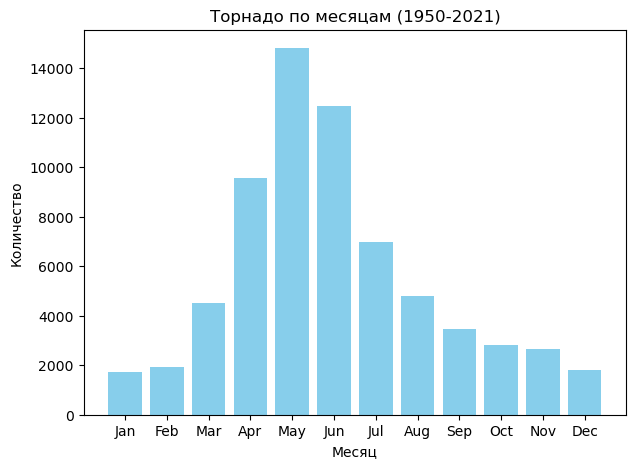

In [17]:
count_vec = [len(df[df.mo == month]) for month in range(1, 13)]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(7, 5))
plt.bar(range(1, 13), count_vec, color='skyblue')
plt.title("Торнадо по месяцам (1950-2021)")
plt.xlabel("Месяц")
plt.ylabel("Количество")
plt.xticks(range(1, 13), labels=months)
plt.show()

# больше всего торнадо в мае

Text(0.5, 1.0, 'Количество торнадо по годам')

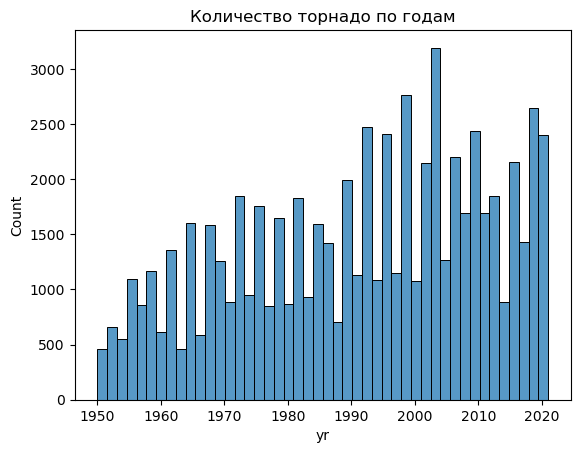

In [14]:
sns.histplot(df['yr'])
plt.title('Количество торнадо по годам')

<AxesSubplot:title={'center':'количество раненых из-за торнадо по штатам'}, xlabel='st', ylabel='inj'>

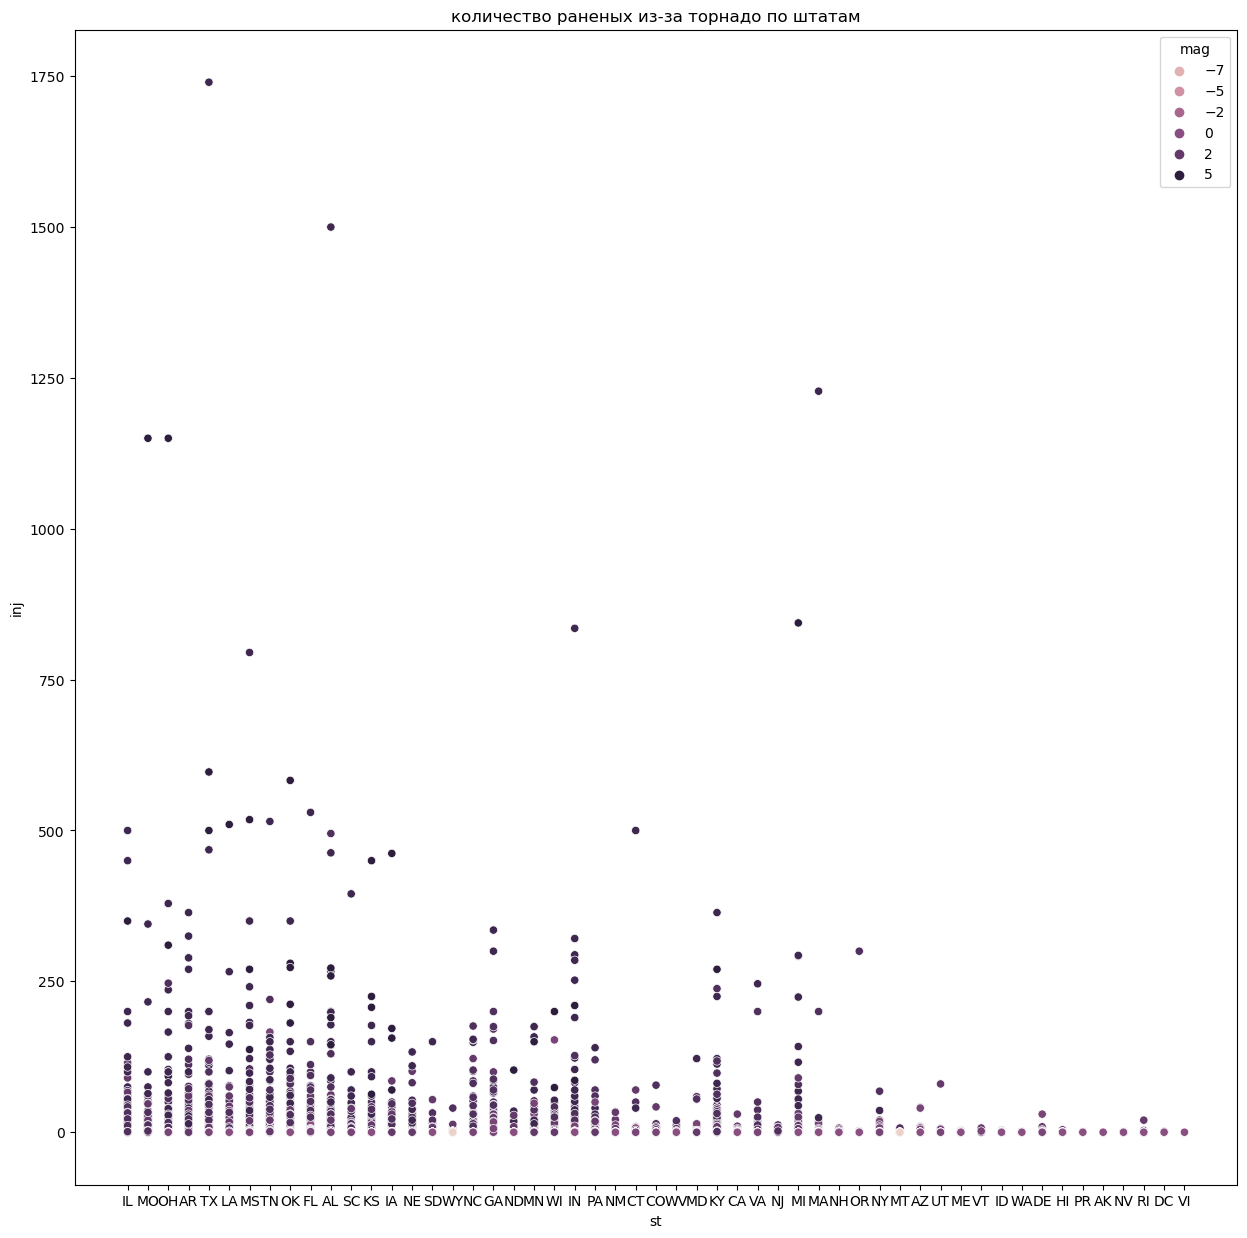

In [15]:
plt.figure(figsize=(15,15))
plt.title("количество раненых из-за торнадо по штатам")
sns.scatterplot(df, x='st', y = 'inj', hue = 'mag')

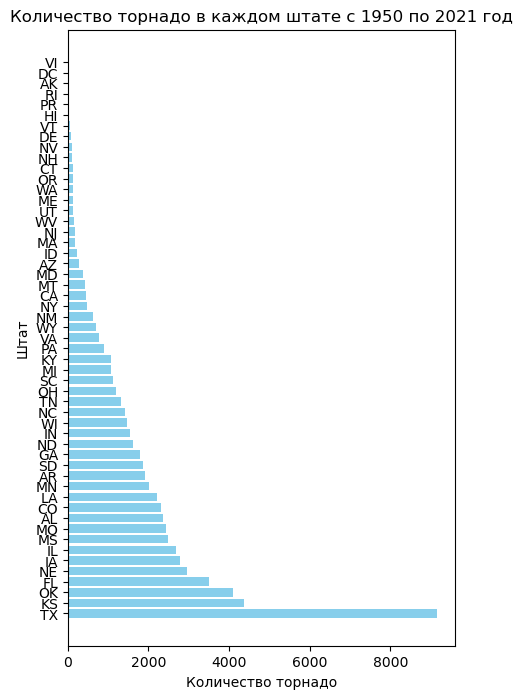

In [18]:
plt.figure(figsize=(5, 8))
plt.barh(df['st'].value_counts().index, df['st'].value_counts(), color='skyblue')
plt.xlabel("Количество торнадо")
plt.ylabel("Штат")
plt.title("Количество торнадо в каждом штате с 1950 по 2021 год")
plt.show()

array([[<AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mo'}>,
        <AxesSubplot:title={'center':'dy'}>],
       [<AxesSubplot:title={'center':'mag'}>,
        <AxesSubplot:title={'center':'inj'}>,
        <AxesSubplot:title={'center':'fat'}>],
       [<AxesSubplot:title={'center':'slat'}>,
        <AxesSubplot:title={'center':'slon'}>,
        <AxesSubplot:title={'center':'elon'}>],
       [<AxesSubplot:title={'center':'len'}>,
        <AxesSubplot:title={'center':'wid'}>, <AxesSubplot:>]],
      dtype=object)

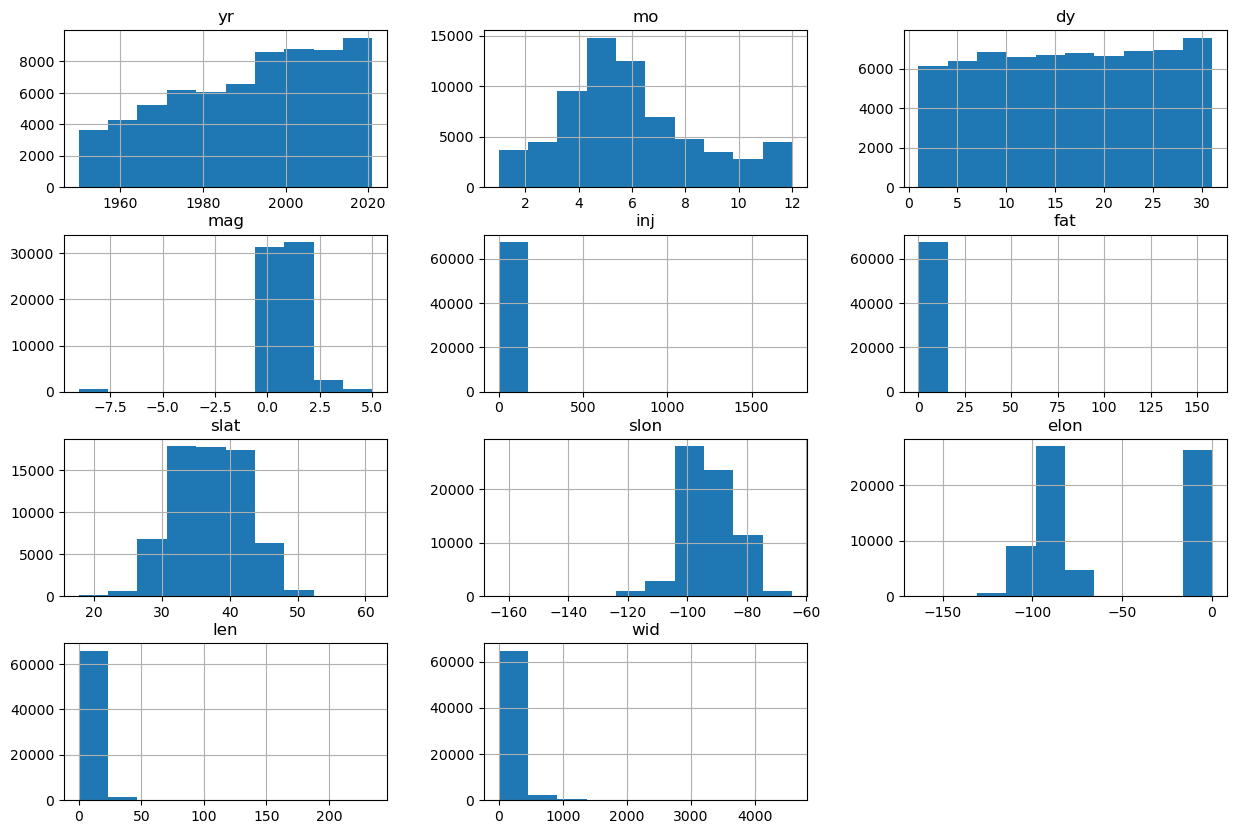

In [21]:
df.hist(figsize=(15,10))

# распределение атрибутов 

# Применение one hot encoder

In [37]:
df = pd.get_dummies(df, columns=['st'])

# Линейная регрессия

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовом наборе данных:", test_mse)

MSE на тестовом наборе данных: 1.2301037085373567


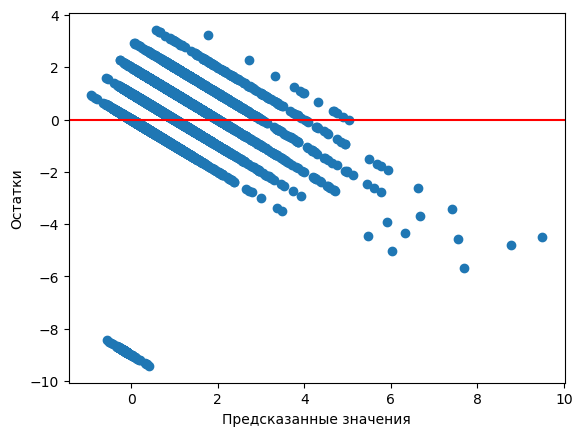

In [20]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


# Дерево регрессии

In [52]:
from sklearn.tree import DecisionTreeRegressor
params = {
    'max_depth': 4,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.0842609137188621


# Нейросеть

In [72]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras as keras

In [17]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)

Epoch 1/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 450.5549 - val_loss: 1.7873
Epoch 2/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.7449 - val_loss: 3.5327
Epoch 3/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.0993 - val_loss: 6.3817
Epoch 4/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 8.9279 - val_loss: 152.4382
Epoch 5/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 32.3015 - val_loss: 1.9413
Epoch 6/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.6845 - val_loss: 88.5435
Epoch 7/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 7.3879 - val_loss: 3.1579
Epoch 8/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.1059 - val_loss: 1.4002
Epoch 9/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.8288 - val_loss: 3.3282
Epoch 10/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6.6213 - val_loss: 1.2968
Epoch 11/50
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.9118 - val_loss: 3.5211
Epoch 12/50
1183/1183 ━━

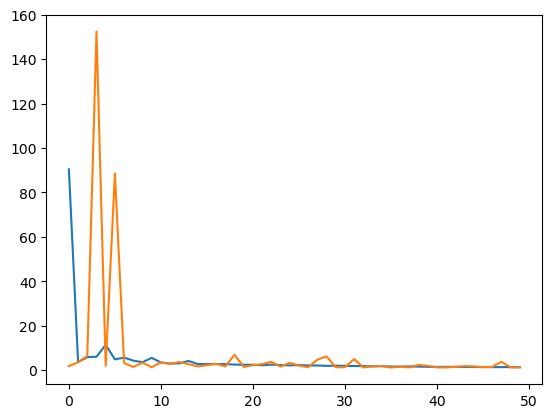

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Логистическая регрессия

In [15]:
mean_mag = df['mag'].mean()
df['mag'] = df['mag'].apply(lambda x: 'strong' if x >= mean_mag else 'weak')

# для классификации категоризировала магнитуду на слабую и сильную

In [7]:
from sklearn.linear_model import LogisticRegression
X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      strong       0.80      0.69      0.74      7004
        weak       0.71      0.81      0.76      6508

    accuracy                           0.75     13512
   macro avg       0.76      0.75      0.75     13512
weighted avg       0.76      0.75      0.75     13512



# Дерево класссификации

# подбор параметров с помощью оптуна

In [9]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 14.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import optuna
from sklearn.tree import DecisionTreeClassifier
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    
    model = DecisionTreeClassifier(
        criterion=criterion, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = classification_report(y_test, y_pred, output_dict=True)['accuracy']
    
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


print("Best trial:")
print(study.best_trial.params)
print("Best accuracy:", study.best_trial.value)

[I 2024-04-21 21:57:12,503] A new study created in memory with name: no-name-55d8f072-a933-4ca5-a8b5-c9ad6dc07fb9
[I 2024-04-21 21:57:13,964] Trial 0 finished with value: 0.7898164594434577 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7898164594434577.
[I 2024-04-21 21:57:15,285] Trial 1 finished with value: 0.7718571146635089 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 30, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.7898164594434577.
[I 2024-04-21 21:57:16,820] Trial 2 finished with value: 0.7814288533649102 and parameters: {'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 18, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.7898164594434577.
[I 2024-04-21 21:57:18,235] Trial 3 finished with value: 0.7894710874284586 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 24, 'min_samples_leaf': 23}. Best is trial 0 with 

Best trial:
{'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 29}
Best accuracy: 0.7942076179198737


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params = {
    'criterion': 'entropy',
    'max_depth': 22,
    'min_samples_split': 5,
    'min_samples_leaf': 29
}
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.79      0.83      0.81     10556
        weak       0.80      0.76      0.78      9712

    accuracy                           0.79     20268
   macro avg       0.79      0.79      0.79     20268
weighted avg       0.79      0.79      0.79     20268



# Random Forest

In [18]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    model = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = classification_report(y_test, y_pred, output_dict=True)['accuracy']
    return accuracy

X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

print("Best trial:")
print(study.best_trial.params)
print("Best accuracy:", study.best_trial.value)


[I 2024-04-22 08:20:45,145] A new study created in memory with name: no-name-6724df99-6456-421c-945b-15ed46a6b712
[I 2024-04-22 08:20:49,779] Trial 0 finished with value: 0.7990921649891455 and parameters: {'n_estimators': 54, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7990921649891455.
[I 2024-04-22 08:21:05,142] Trial 1 finished with value: 0.8144858890862443 and parameters: {'n_estimators': 153, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8144858890862443.
[I 2024-04-22 08:21:19,756] Trial 2 finished with value: 0.8120189461219657 and parameters: {'n_estimators': 158, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8144858890862443.
[I 2024-04-22 08:21:31,461] Trial 3 finished with value: 0.8136471284783896 and parameters: {'n_estimators': 117, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value:

Best trial:
{'n_estimators': 153, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}
Best accuracy: 0.8144858890862443


# лучшие параметры, подставим их в модель

In [25]:
from sklearn.ensemble import RandomForestClassifier
X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestClassifier(n_estimators=163,max_depth=19, min_samples_split=3, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      strong       0.82      0.83      0.82     10607
        weak       0.81      0.80      0.81      9661

    accuracy                           0.82     20268
   macro avg       0.81      0.81      0.81     20268
weighted avg       0.82      0.82      0.82     20268



# CAT boost

In [31]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 48.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 14.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', random_seed=42)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)
y_pred = model.predict(X_test)


0:	learn: 0.6397751	test: 0.6402819	best: 0.6402819 (0)	total: 80.9ms	remaining: 1m 20s
100:	learn: 0.4138137	test: 0.4218970	best: 0.4218970 (100)	total: 2.23s	remaining: 19.9s
200:	learn: 0.3958051	test: 0.4147986	best: 0.4147986 (200)	total: 4.32s	remaining: 17.2s
300:	learn: 0.3823853	test: 0.4123637	best: 0.4123637 (300)	total: 6.38s	remaining: 14.8s
400:	learn: 0.3708078	test: 0.4108054	best: 0.4107936 (398)	total: 8.45s	remaining: 12.6s
500:	learn: 0.3606961	test: 0.4095150	best: 0.4094981 (489)	total: 10.5s	remaining: 10.5s
600:	learn: 0.3521952	test: 0.4089321	best: 0.4089321 (600)	total: 12.6s	remaining: 8.35s
700:	learn: 0.3441367	test: 0.4085090	best: 0.4083993 (679)	total: 14.6s	remaining: 6.24s
800:	learn: 0.3363964	test: 0.4084244	best: 0.4083993 (679)	total: 16.7s	remaining: 4.15s
900:	learn: 0.3287420	test: 0.4084647	best: 0.4081823 (846)	total: 18.8s	remaining: 2.07s
999:	learn: 0.3220402	test: 0.4087474	best: 0.4081823 (846)	total: 20.9s	remaining: 0us

bestTest = 0.

In [33]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.82      0.82      0.82     10607
        weak       0.80      0.80      0.80      9661

    accuracy                           0.81     20268
   macro avg       0.81      0.81      0.81     20268
weighted avg       0.81      0.81      0.81     20268



# в данном случае все модели регрессии справляются примерно одинаково неплохо , лучше всего работает дерево. в случае классификации лучше всего справился алгоритм рандом форест